In [2]:
import functools
import warnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import tensorflow.compat.v2 as tf
import tensorflow_probability as tfp

from tensorflow_probability import distributions as tfd

tf.enable_v2_behavior()

plt.style.use("ggplot")
warnings.filterwarnings('ignore')

In [178]:
Root = tfd.JointDistributionCoroutine.Root
def GMM(data_dim, latent_dim, num_datapoints, stddv_datapoints, components):
    
    # We start by generating a sigma^2
    mu = yield Root(tfd.Independent(tfd.Dirichlet(
    concentration=np.ones(3),
    name='mu')))
    
    # Then the latent data z
#     z = yield Root(tfd.Independent(
#         tfd.Normal(loc=tf.zeros([latent_dim, num_datapoints]),
#                  scale=1.0*tf.ones([latent_dim, num_datapoints]),
#                  name="z"), reinterpreted_batch_ndims=2))
    cats = yield Root(tfd.Independent(tfd.Categorical(probs=mu*np.ones((15,3)))))

    x = yield Root(tfd.Independent(tfd.MixtureSameFamily(
    mixture_distribution=tfd.Categorical(probs=mu),
    components_distribution=tfd.Normal(
      loc=[-100, 10,300], scale=[0.1, 0.5,0.4]))))#*np.ones((num_datapoints,components)), scale=[0.1, 0.5,0.4]*np.ones((num_datapoints,components))))))
    
#     x = yield Root(tfd.Independent(tfd.MixtureSameFamily(
#     mixture_distribution=tfd.Categorical(probs=mu),
#     components_distribution=tfd.MultivariateNormalDiag(
#       loc=[-100, 10,300], scale_diag=0.01*tf.ones((3,3))))))
    
num_datapoints = 500
data_dim = 3
latent_dim = 2
stddv_datapoints = 0.3
components = 3

Gaussian_mixture_model = functools.partial(GMM,
    data_dim=data_dim,
    latent_dim=latent_dim,
    num_datapoints=num_datapoints,
    stddv_datapoints=stddv_datapoints,
    components = components)

gmm = tfd.JointDistributionCoroutine(Gaussian_mixture_model)

In [196]:
[3,4,5]*np.ones((15,3))
[gmm.sample()[1]]

[<tf.Tensor: id=511454, shape=(15,), dtype=int32, numpy=array([0, 1, 1, 0, 0, 1, 2, 0, 0, 1, 0, 1, 0, 0, 1], dtype=int32)>]

In [161]:
test = tfd.Normal(loc=[10,30,100][tfd.Categorical(probs=[0.1,0.3,0.6]).sample()], scale=1)
test.sample()
test.mean()

<tf.Tensor: id=509875, shape=(), dtype=float32, numpy=30.0>

In [162]:
test.mean()

<tf.Tensor: id=509879, shape=(), dtype=float32, numpy=30.0>

In [158]:
results = []
for i in range(1000):
    test = tfd.Normal(loc=[10,30,100][tfd.Categorical(probs=[0.1,0.3,0.6]).sample()], scale=1)
    x_train = test.sample()
    results.append(x_train)

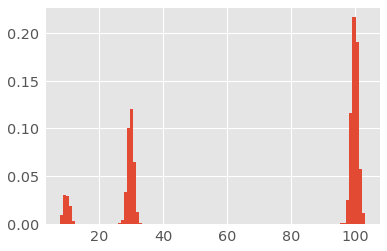

In [159]:
plt.hist(results,bins=100, density=True)
plt.show()

tfp.distributions.Categorical("Categorical", batch_shape=[1], event_shape=[], dtype=int32)
tf.Tensor(
[[[0.07212555]
  [0.5266396 ]
  [0.72306037]]], shape=(1, 3, 1), dtype=float32)
tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[1, 3], event_shape=[1], dtype=float32)
tfp.distributions.MixtureSameFamily("MixtureSameFamily", batch_shape=[1], event_shape=[1], dtype=float32)
tfp.distributions.Independent("IndependentMixtureSameFamily", batch_shape=[], event_shape=[1, 1], dtype=float32)
[[[ 1.26026601e-01]]

 [[ 5.38514912e-01]]

 [[ 5.24982214e-01]]

 [[ 5.45533359e-01]]

 [[ 1.16080791e-01]]

 [[ 5.18149018e-01]]

 [[ 7.29472265e-02]]

 [[ 5.96384168e-01]]

 [[ 5.37687957e-01]]

 [[ 7.45228767e-01]]

 [[ 5.67607164e-01]]

 [[ 1.15268461e-01]]

 [[ 9.61530730e-02]]

 [[ 7.69946054e-02]]

 [[ 5.42116404e-01]]

 [[ 4.67301756e-01]]

 [[ 4.87370819e-01]]

 [[ 8.16948563e-02]]

 [[ 6.94447577e-01]]

 [[ 7.08994746e-01]]

 [[ 5.45511901e-01]]

 [[ 9.67071950e-02

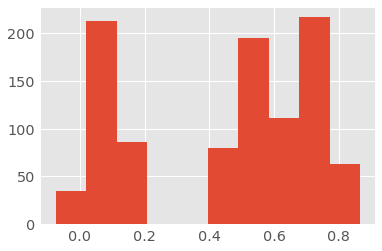

In [79]:
num_vars = 1        # Number of variables (`n` in formula).
var_dim = 1         # Dimensionality of each variable `x[i]`.
num_components = 3  # Number of components for each mixture (`K` in formula).
sigma = 5e-2        # Fixed standard deviation of each component.

# Set seed.
tf.random.set_seed(77)

# categorical distribution
categorical = tfd.Categorical(logits=tf.zeros([num_vars, num_components]))
print(categorical)
# Choose some random (component) modes.
component_mean = tfd.Uniform().sample([num_vars, num_components, var_dim])
print(component_mean)
# component distribution for the mixture family
components = tfd.MultivariateNormalDiag(loc=component_mean, scale_diag=[sigma])
print(components)
# create the mixture same family distribution
distribution_family = tfd.MixtureSameFamily(mixture_distribution=categorical, components_distribution=components)
print(distribution_family)
# Combine the distributions
mixture_distribution = tfd.Independent(distribution_family, reinterpreted_batch_ndims=1)
print(mixture_distribution)
# Extract a sample from the distribution
samples = mixture_distribution.sample(1000).numpy()
print(samples)
# Plot the distributions
plt.hist(samples[:, 0, 0])
plt.show()